In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns

In [91]:
from sklearn.model_selection import train_test_split

In [95]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

**Reading the data**

In [2]:
original_data = pd.read_csv('Titanic-Dataset.csv')

**Data Analysis**

In [72]:
copy_data = original_data.copy()
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


891 examples and 11 features (2 are float, 5 are int and 5 are obj) + the target variable (survived)

In [50]:
copy_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


38% survived

In [17]:
copy_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Some features need to be converted into numeric ones (in order for the ml algorithms to be able to process them)
2. Features vary in range -> need to be converted into the same scale
3. There are some missing values that need to be dealt with

**Handling missing values**

In [51]:
missing_values = (copy_data.isnull().sum()/len(copy_data))*100
print(missing_values)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


'Embarked': 2 missing values<br>
'Age': about 20% missing<br>
'Cabin': 77% missing<br>

In [52]:
copy_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Irrelevant features? PassengerID, Ticket and Name 

**Comparing the age distribution of both sexes based on their survival status**

**Age and Sex**

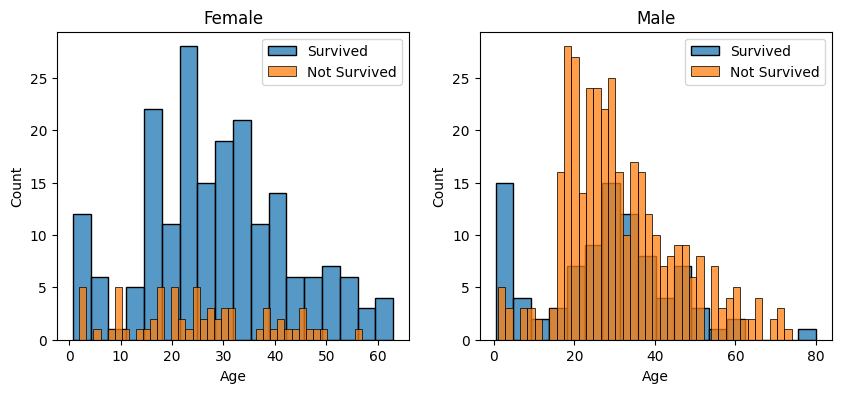

In [73]:
# filter data for females and males
women = copy_data[copy_data['Sex'] == 'female']
men = copy_data[copy_data['Sex'] == 'male']

# subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

"""
-> 'kde' parameter controls whether a Kernel Density Estimate (KDE) plt should be displayed along with the histogram
-> When 'kde=True', seaborn will overlay a smooth KDE curve on top of the histogram bars,
else, they'll be shown without it (just plot the histogram)

-> 'ax' parameter specifies the subplot (or axis) where the plot will be drawn.
"""

"""
-> 'ax=axes[0]' specifies the first (left) subplot , along with 'kde=False', this ensures that only the histogram
 is displayed for the age distribution of survived and not survived females.
"""
# age distrbution for survived females
sns.histplot(women[women['Survived'] == 1]['Age'].dropna(), bins=18, label='Survived', ax=axes[0], kde=False)
# age distrbution for not survived females
sns.histplot(women[women['Survived'] == 0]['Age'].dropna(), bins=40, label='Not Survived', ax=axes[0], kde=False)

axes[0].legend()
axes[0].set_title('Female')

# age distrbution for survived males
sns.histplot(men[men['Survived'] == 1]['Age'].dropna(), bins=18, label='Survived', ax=axes[1], kde=False)
# age distrbution for not survived males
sns.histplot(men[men['Survived'] == 0]['Age'].dropna(), bins=40, label='Not Survived', ax=axes[1], kde=False)

axes[1].legend()
axes[1].set_title('Male')

plt.show()


<ul>
   <li>men have a high probability of survival when they are between 18 and 30 years old</li>
   <li>women the survival chances are higher between 14 and 40</li>
   <li>men's probability of survival is very low between the age of 5 and 18, unlike women</li>
   <li>babies have a higher probability of survival</li>
</ul>

@TODO create age groups


**Pclass**

<Axes: xlabel='Pclass', ylabel='Survived'>

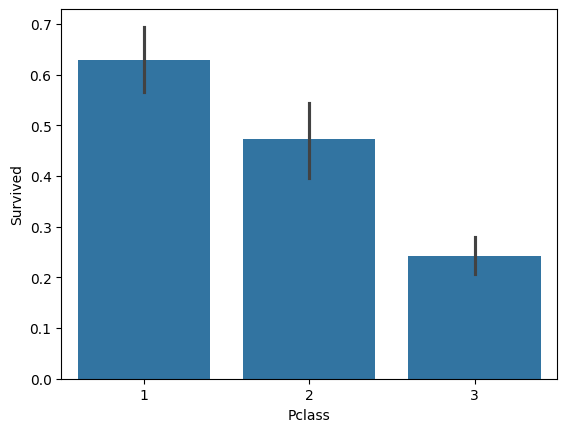

In [74]:
sns.barplot(x='Pclass', y='Survived', data=copy_data)

people in class 1 have a higher chance od survival

**-> Merging SibSp and Parch into a single column indicating the total number of relatives**<br>
**-> Create an extra feature 'not_alone'**

In [75]:
copy_data['relatives'] = copy_data['SibSp'] + copy_data['Parch']

copy_data['not_alone'] = (copy_data['relatives'] > 0).astype(int)

print(copy_data['not_alone'].value_counts())

not_alone
0    537
1    354
Name: count, dtype: int64


Alone: 537 passengers<br>
Not Alone : 354 passengers

<Axes: xlabel='relatives', ylabel='Survived'>

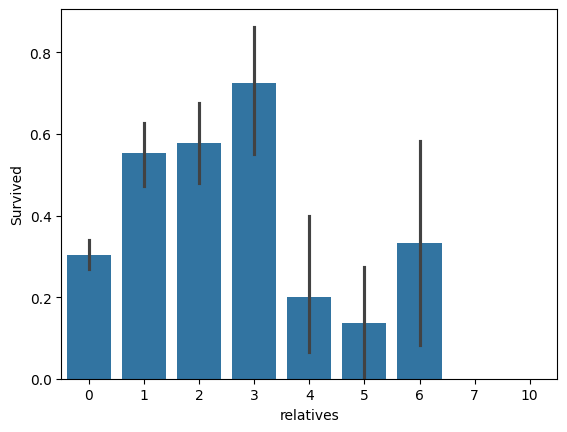

In [76]:
sns.barplot(x='relatives', y='Survived', data=copy_data)

-> high probabilty of survival with 1 to 3 realitves<br> -> lower one with less than 1 or more than 3 (except for some cases with 6 relatives)

**Data Preprocessing**

**Missing Data**

In [77]:
# Irrelevant
copy_data = copy_data.drop(['PassengerId'], axis=1)

In [78]:
# more than 70 % missing values therefore dropped the whole column
copy_data.drop('Cabin', axis=1, inplace=True)

In [79]:
# replacing null values with the mean of the rest of the column's values
copy_data['Age'].fillna(copy_data['Age'].mean(), inplace=True)

In [80]:
# only 2 missing values, therefore -> fill these with the most common one
copy_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [81]:
common_value = 'S'

copy_data['Embarked'] = copy_data['Embarked'].fillna(common_value)

**Converting Features**

In [82]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


**Fare: (float -> int)**

In [83]:
copy_data['Fare'] = copy_data['Fare'].fillna(0)
copy_data['Fare'] = copy_data['Fare'].astype(int)

**Sex: (str -> numeric)**

In [84]:
genders = {"male": 0, "female": 1}
copy_data['Sex'] = copy_data['Sex'].map(genders)

**Embarked: (str -> numeric)**

In [85]:
ports = {"S": 0, "C": 1, "Q": 2}
copy_data['Embarked'] = copy_data['Embarked'].map(ports)

In [86]:
copy_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,1,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,0,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,0,0,0


In [87]:
copy_data = copy_data.drop(['Name'], axis=1)

In [89]:
copy_data = copy_data.drop(['Ticket'], axis=1)

In [90]:
copy_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,0,22.0,1,0,7,0,1,1
1,1,1,1,38.0,1,0,71,1,1,1
2,1,3,1,26.0,0,0,7,0,0,0
3,1,1,1,35.0,1,0,53,0,1,1
4,0,3,0,35.0,0,0,8,0,0,0


**Splitting the data**

In [97]:
train, test = train_test_split(copy_data, test_size=0.2, random_state=42)

print(f"Training set has {train.shape[0]} rows.")
print(f"Test set has {test.shape[0]} rows.")

Training set has 712 rows.
Test set has 179 rows.


In [98]:
# features for the training data
X_train = train.drop("Survived", axis=1)

# labels for the training data
Y_train = train["Survived"]

# features for the test data
X_test = test.drop("Survived", axis=1)

# labels for the test data
Y_test = test["Survived"]


**Building ML Models**

**Logistic Regression**

In [99]:
# create a Logistic Regression model
logreg = LogisticRegression()

# train the model using the training data
logreg.fit(X_train, Y_train)

# use the trained model to make predictions on the test data
Y_pred = logreg.predict(X_test)


[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


c:\Users\nourh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy * 100}%")

Accuracy: 79.88826815642457%


**Random Forest Classifier**

In [109]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(Y_test, Y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf * 100}%")


Random Forest Accuracy: 82.12290502793296%


**K-Nearest Neigbors Classifier**

In [103]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(Y_test, Y_pred_knn)

print(f"K-Nearest Neighbors Accuracy: {accuracy_knn * 100}%")


K-Nearest Neighbors Accuracy: 70.39106145251397%


**Cross Validation**

In [105]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80555556 0.80555556 0.71830986 0.84507042 0.77464789 0.73239437
 0.81690141 0.76056338 0.76056338 0.85915493]
Mean: 0.7878716744913927
Standard Deviation: 0.044050080915918735


average accuracy of 78% <br>
with a standard deviation of 4 % which means that the model's accuracy can differ +- 4%

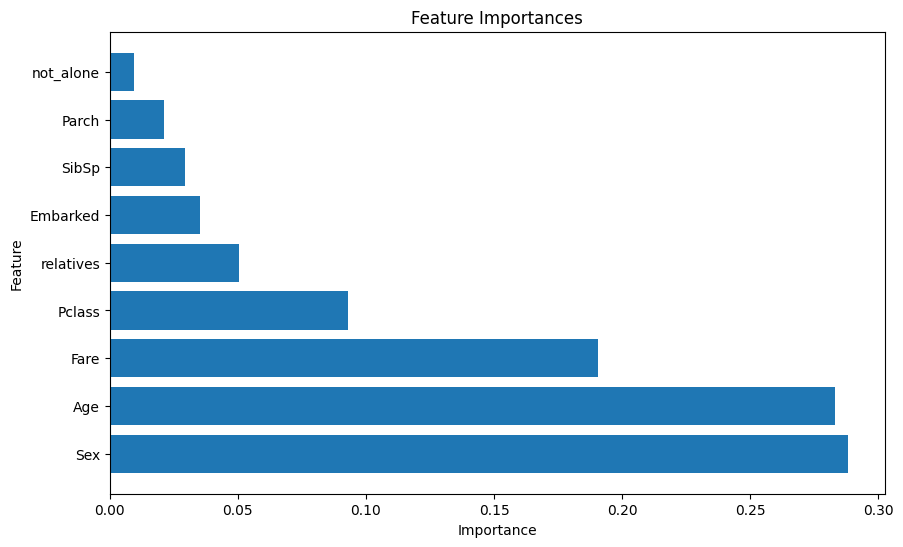

In [110]:
feature_importances = rf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df.sort_values('Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [111]:
copy_data  = copy_data.drop("not_alone", axis=1)
copy_data  = copy_data.drop("Parch", axis=1)
copy_data  = copy_data.drop("SibSp", axis=1)

**Training random forest again:**

In [112]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

96.35 %


**out of bag estimate:**

In [113]:
print("oob score:",
     round(random_forest.oob_score_, 4)*100, "%")

oob score: 79.78 %


**Confusion Matrix**

In [114]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[373,  71],
       [ 77, 191]], dtype=int64)

The first row is about the not-survived-predictions: 373 passengers were correctly classified as not survived (true negatives) and 71 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 77 passengers where wrongly classified as survived (false negatives) and 191 where correctly classified as survived (true positives).

**Precision and Recall**

In [115]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7290076335877863
Recall: 0.7126865671641791


**Precision:** the model predicts 72% of the time, a passengers survival correctly .<br>
**Recall:** the predicted the survival of 71 % of the people who actually survived.